# Random walking dead

**MOD510 - Project 4 G05**   
- Parthasarathi Jena
- Jing Hou
- Hodjat Moradi  

Date: Dec.10.2023

In [2]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython import display
#%matplotlib

## Learning objectives. 
By completing this project, the student will:  
• Learn how to escape a zombie outbreak by modeling the outbreak as a
random walk.  
• Use Monte Carlo techniques to quantify model uncertainty.  
• Investigate how model parameters in a continuum model can be predicted
from random walk.  
• Get insight into mechanisms important for spread of infectious diseases.  




## Abstract:
In this project "Random Walk" (RW) algorithms are to simulate the spread of zombie virus after an outbreak has occurred. 

A SZ model is implemented using simple random walk algorithms in a two-dimensional space. It is then shown numerically that the deterministic SZR model (based on ODEs) 

The RW model is further extended to include scenarios  etc. 

## Introduction:


- Little bit about infections. 
- how do infection spread by contact. 
- general compartment models
- ref a couple of scientific articles on infection spread
- monte carlo simulations as an alternative to ODE models



## Exercise 1: Random walk SZ-model

SZ- model simulation include: 

- *The initial preparation:*
    - Create a $n_x \times n_y$ $ (50 \times 50)$ rectangular grid lattice.
    - Place $N$ (683) numbered human randomly at nodes within the rectangular grid at $t=0$ .
    - $Z$ numbered zombies out of the total number $N$, are considered to be placed randomly within the rectangular grid lattice.
    - $S = N - Z$ out of the total $N$, are considered to be susceptible to the zombies.  

- *Update walker position:*
    - All walkers can move randomly, either North, West, South, or East.
    - If a walker moves illegally outside of the rectangular grid, it will revert to the previous position.

- *Check the state:*
    - Check if the human walker is standing in the same position as the zombie, If yes, the human waker will be infected by the zombie and this human walker is going to be converted to the status of zombie. If not, the random walking process continues. 

- *Status history tracking:*
    - mark the number of human and zombies and store these numbers in a set of arrays. 

- *The simulation visualization:*
    - Plot and visualize the status of humans and zombies accordingly and the total number of humans and zombies. 

### Task 1
• Write a class (or function) that can be used to conduct a single simulation of the random walk algorithm for the SZ-model.

**Question 1:** Assume that there is a single zombie initially, $Z(0) = 1$, what is the fate of the zombie and human population? (Figure 4 gives an indication of
what we expect as an answer.)

In this stage, the given condition is:

- $Z(0) = 1$,  only one zombie initially.
- $N = 683$, the total human population is 683.
- The grid $n_x \times n_y  = 50 \times 50$.
- $q = 0.9$,  the probability of getting infected is 90%.
- $t = 300$. each run is 300 time steps long.
- The simulation runs visualization: 10 times vs 100 times.

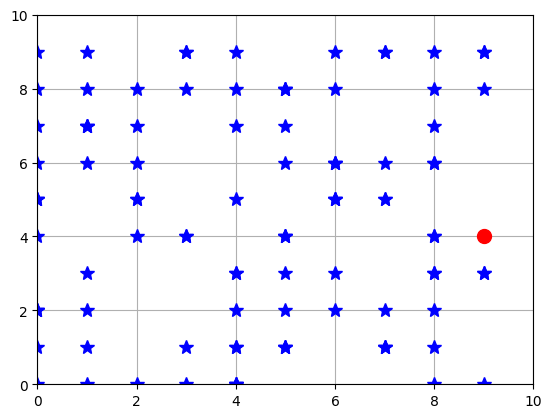

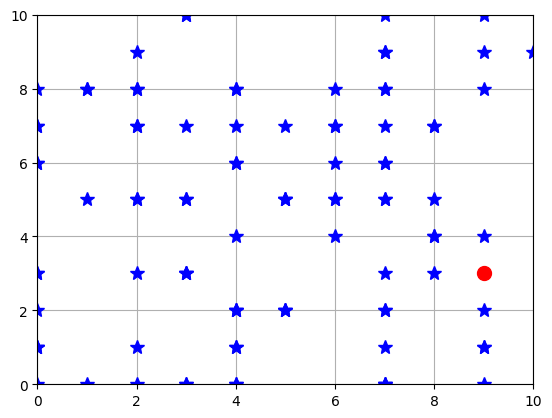

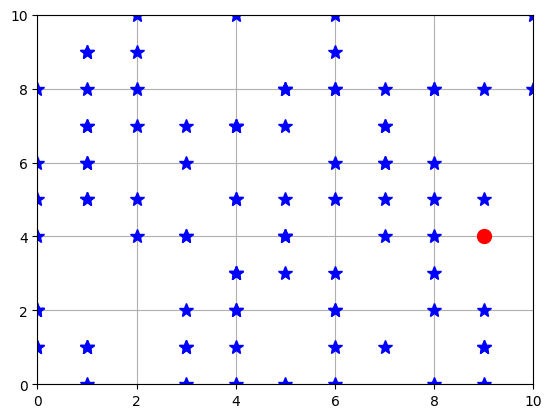

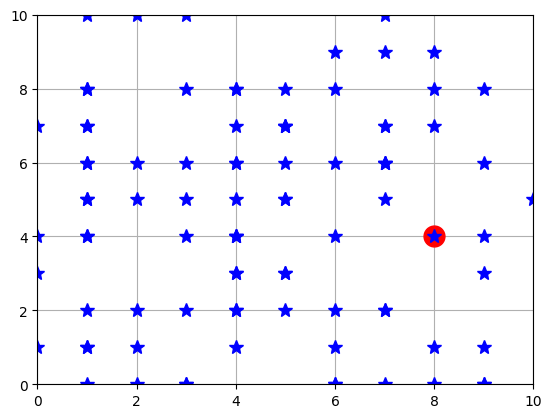

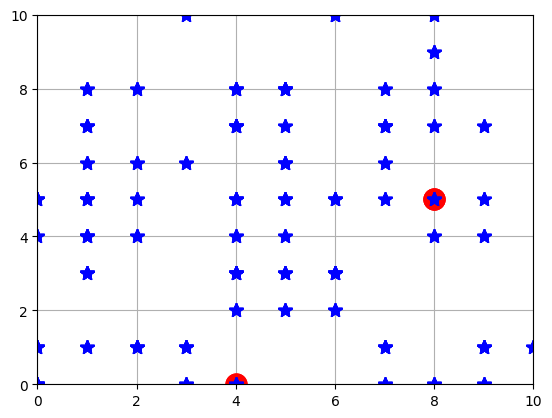

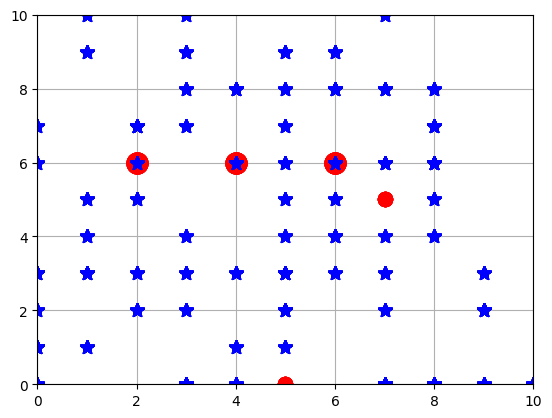

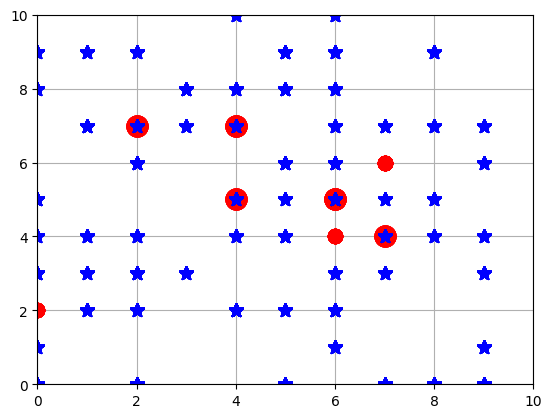

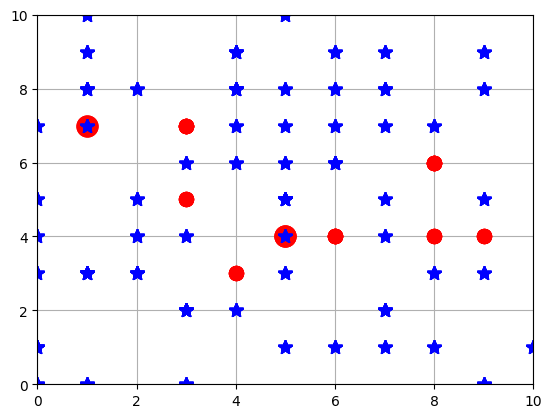

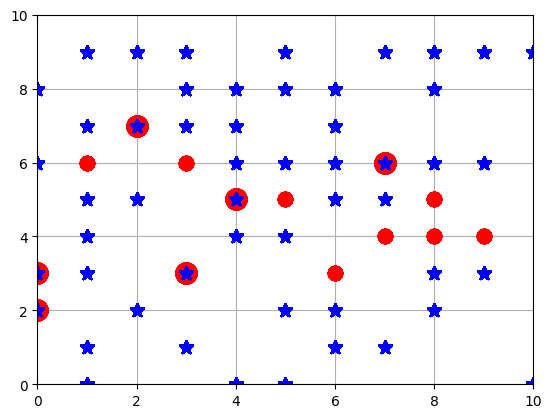

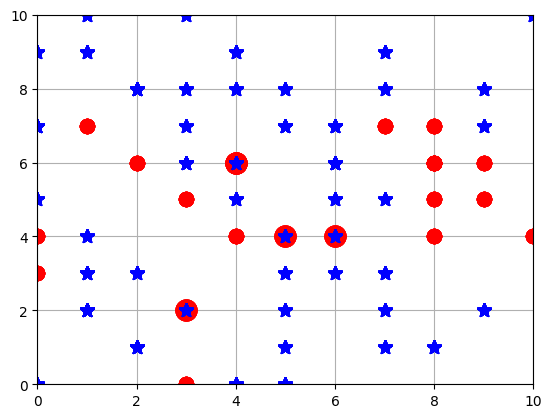

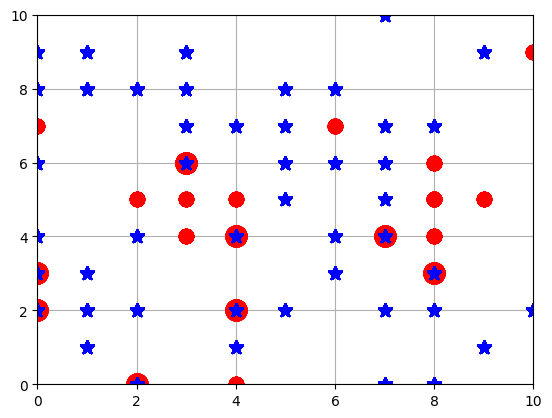

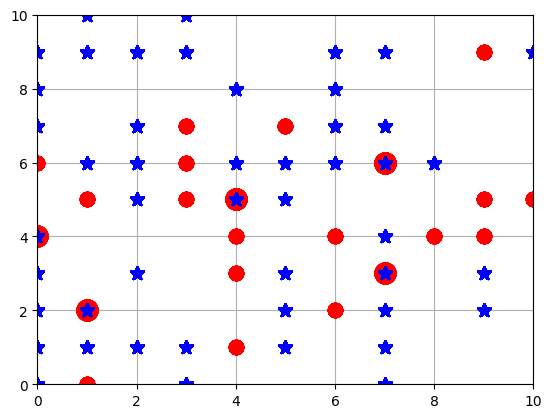

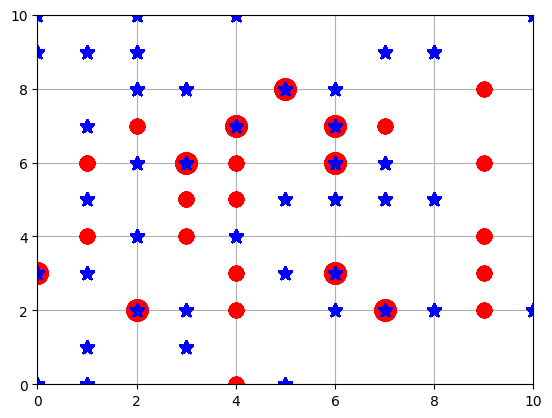

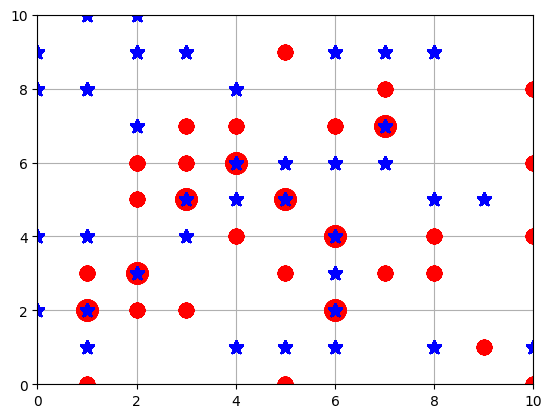

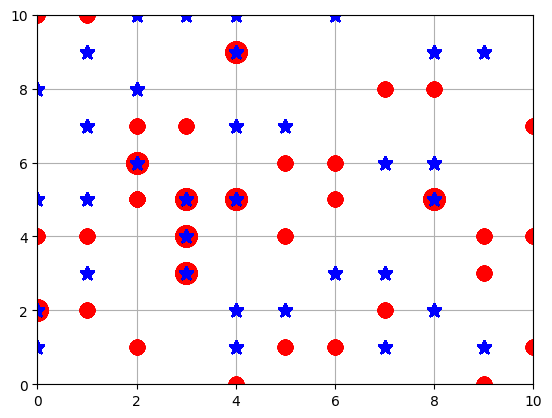

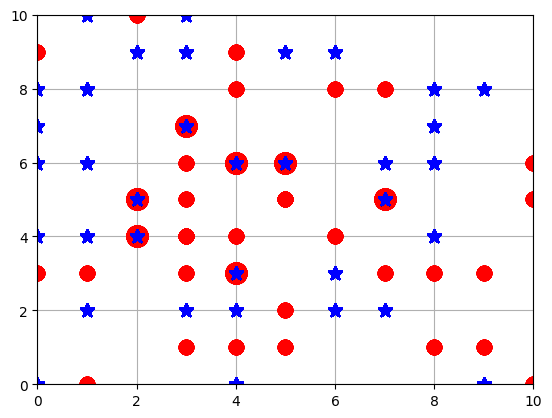

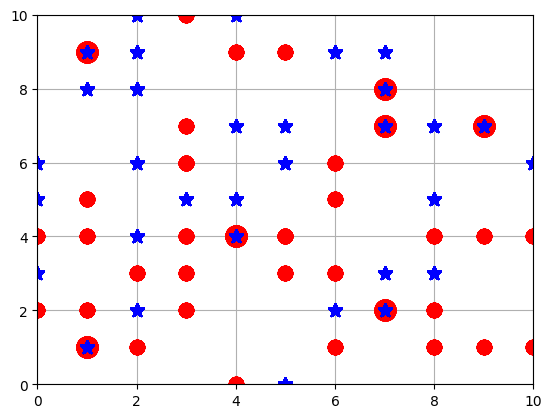

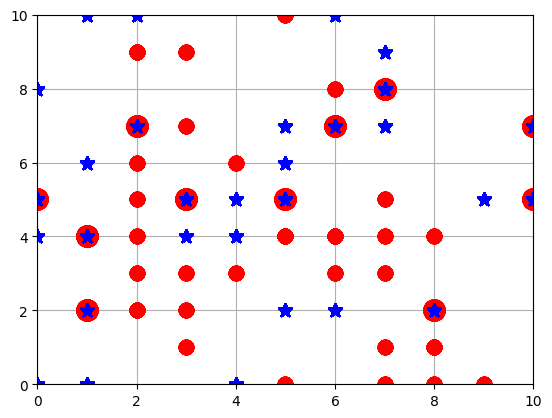

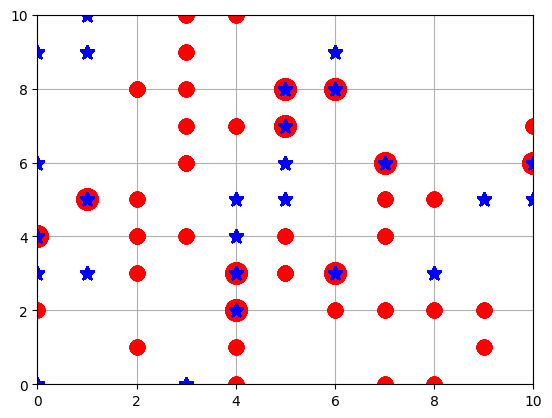

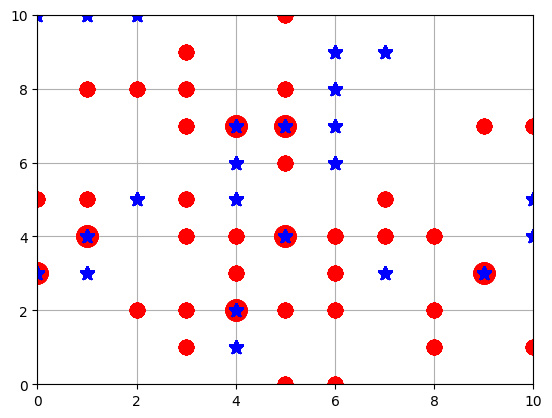

In [3]:
N_ = 100
nx_ = 10
ny_ = 10
q = 0.9

# Initialize population and their (x,y) grid positions
walker_ = np.random.randint(0,[nx_, ny_],size=(N_, 2))
walker_old = np.copy(walker_) # why needed?

human, zombie=0,1
numberOfZombies = 1

# Set all states to Human
states = np.repeat(human,N_)

# Update state to include one Zombie
states[:numberOfZombies] = zombie

# Set possible walking directions
directions = np.array([[-1,0],[0,1],[1,0],[0,-1]])

def IsLocationEqual(location1, location2):
    isEqual=False
    if (location1[0] == location2[0]) and (location1[1] == location2[1]):
        isEqual=True
    return isEqual

def FindZombieOverlapsWithHumans(zombiePositions, humanPositions):
    # Find overlaps
    locations=[]
    for zombiePosition in zombiePositions:
        for humanPosition in humanPositions:
            if (IsLocationEqual(zombiePosition, humanPosition)):
                locations=locations+[zombiePosition]
    
    # Return if no overlaps
    if len(locations) == 0:
        return locations
    
    # Remove duplicates, if any
    locationsUnique=[locations[0]]
    for locationA in locations:
        for locationB in locations:
            if not IsLocationEqual(locationA, locationB):
                locationsUnique=locationsUnique+[locationA]
    
    # All values same, so use first item as unique one
    if len(locationsUnique) == 0:
        locationsUnique=[locations[0]]
    
    return locationsUnique

def RemoveOverlapsIfAny(locations, overlaps):
    if len(overlaps) == 0:
        return locations
    
    locationsWithNoOverlap=[]
    for location in locations:
        for overlap in overlaps:
            if not IsLocationEqual(location, overlap):
                locationsWithNoOverlap=locationsWithNoOverlap+[location]
    return locationsWithNoOverlap

def plot():
    # Get current positions
    h_coord = walker_[states==human]
    z_coord = walker_[states==zombie]

    # Find overlaps
    overlaps = FindZombieOverlapsWithHumans(z_coord, h_coord)

    # Humans, no chance to become infected
    humansWithNoOverlapsToZombies=RemoveOverlapsIfAny(h_coord, overlaps)
    
    # Zombies, no chance to infect any humans
    zombiesWithNoOverlapsToHumans=RemoveOverlapsIfAny(z_coord, overlaps)
    
    # Plot zombies first (to ensure we see human overlap onto zombie because of smaller marker size of human)
    for zombieLocation in overlaps:
        plt.plot(zombieLocation[0], zombieLocation[1], 'ro', markersize=15)
    for zombieLocation in zombiesWithNoOverlapsToHumans:
        plt.plot(zombieLocation[0], zombieLocation[1], 'ro', markersize=10)
    
    # Plot humans (ie. will appear on top of zombies when they overlap)
    for humanLocation in overlaps:
        plt.plot(humanLocation[0], humanLocation[1], 'b*', markersize=10)
    # Optional, could handle humans differently, ie. larger markersize if human overlap another human
    for humanLocation in humansWithNoOverlapsToZombies:
        plt.plot(humanLocation[0], humanLocation[1], 'b*', markersize=10)
    
    # Do other plot options
    plt.xlim(0,nx_)
    plt.ylim(0,ny_)
    plt.grid()
    plt.show()
    plt.close()

# could add young people and old people (not moving so much)

# The `move()` function is responsible for moving the walkers (humans and zombies) in random directions.
def move():
    global walker_
    x=np.random.randint(0,4,size=N_)
    step = directions[x]
    #print(step)
    walker_= walker_ + step

def check_illegal_move():
    global walker_,walker_old
    wrong_x = np.logical_or(walker_[:,0]<0, walker_[:,0]>=nx_) # return true when the value is too low or too high
    wrong_y = np.logical_or(walker_[:,1]<0, walker_[:,1]>=ny_)
    wrong_xy = np.logical_or(wrong_x,wrong_y)
    walker_[wrong_xy] = walker_old[wrong_xy]
    walker_old =np.copy(walker_)

def ZombieInfectHuman():
    # Get current positions
    h_coord = walker_[states==human]
    z_coord = walker_[states==zombie]

    # Find overlaps
    overlaps = FindZombieOverlapsWithHumans(z_coord, h_coord)
    
    if len(overlaps) == 0:
        return

    # Humans to infect
    # TODO: Handle states already 1/zombie which below gets overriden as 1
    for overlap in overlaps:
        for locationIndex, location in enumerate(h_coord):
            if IsLocationEqual(location, overlap):
                if np.random.rand() < q:
                    states[locationIndex] = zombie

def infection_process(self):
    zombies = self.Walkers[self.State == self.ZOMBIE]
    humans = self.Walkers[self.State == self.HUMAN]

    for zombie in zombies:
        for human in humans:
            if np.all(np.abs(zombie - human) <= 1):
                if np.random.rand() < self.q:
                    self.State[human] = self.ZOMBIE
    
    
# end def
Tstep = 20
for i in range(Tstep):
    plot()
    ZombieInfectHuman()
    move()
    #check_illegal_move()
    
# The issue- the points are moving out. there are a few ways to doing it

    
#plot()
#move()
#plot()

**Question 2:** If we instead started with $Z(0) = 10$, how does the time evolution change?

the similar input as previous question, only with the change of initial numbers of zombies. 
- $Z(0) = 10$,  update with ten zombie to start with.

---------------------------

## Exercise 2: Compare random walk and ODEbased models


-----------------------------
### **Reflections**:



### **Conclusion**: 




### **References**: 

[1] Compartmental models in epidemiology, https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology   
[2] Markov chain, https://en.wikipedia.org/wiki/Markov_chain   
[3] Aksel Hiorth. Modeling and Computational Engineering. https://github.com/ahiorth/CompEngineering, 2022.  
[4] Xin Li, Jin-Xuan Yang, Controlling the spread of infectious diseases by using random walk method to remove many important links, 2023  
[5] Christos Gkantsidis, Milena Mihail, Amin Saberi, Random walks in peer-to-peer networks: Algorithms and evaluation, 2005  
[6] Douglas Kelker. A Random Walk Epidemic Simulation. Journal of the American Statistical Association, 68(344):821–823, 1973.  
[7] S. Triambak and DP Mahapatra. A random walk Monte Carlo simulation study of COVID-19-like infection spread. Physica A: Statistical Mechanics and its Applications,2021.  
[8]   
[9]   

